# Network propagation and localization analysis of AD genes

download network_bio_toolkit code https://github.com/ucsd-ccbb/network_bio_toolkit.  Install dependencies, read documentation.

Agora targets list: https://agora.ampadportal.org/genes/  
AD-by-proxy FUMA GWAS genes:  https://www.nature.com/articles/s41588-018-0311-9  (Table S13).  

In [1]:
import sys
code_path = '/Users/brin/network_bio_toolkit/network_bio_toolkit'
sys.path.append(code_path)

import Heat2
import imp

imp.reload(Heat2)

<module 'Heat2' from '/Users/brin/network_bio_toolkit/network_bio_toolkit/Heat2.pyc'>

In [2]:
# import matplotlib
# matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns

# import community

# import mygene
# mg = mygene.MyGeneInfo()

# latex rendering of text in graphs
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

% matplotlib inline

# import visJS2jupyter.visJS_module
# import visJS2jupyter.visualizations


# Load the AD genes

Nominated target list: https://agora.ampadportal.org/genes/(genes-router:genes-list)
(suggested by Chi Hua)

In [3]:
AD_genes = pd.read_csv('../data/AD_harmonized_targets_20181022_v3.csv')
AD_genes.index=AD_genes['hgnc_symbol']
print(len(AD_genes))
AD_genes.head()

99


,Team,Rank,ensembl_gene_id,hgnc_symbol,Target_Choice_Justification,Predicted_Therapeutic_Direction,Data_used_to_support_target_selection,data_synapseID
hgnc_symbol,,,,,,,,
IL10RA,Mayo-UFL-ISB,1.0,ENSG00000110324,IL10RA,Reducing this molecules signaling has benefici...,Antagonism predicted to reduce disease progres...,Antagonism of Il10 signaling via KO or sIL10Ra...,syn17008061
IL10,Mayo-UFL-ISB,2.0,ENSG00000136634,IL10,Reducing this molecules signaling has benefici...,Antagonism predicted to reduce disease progres...,Increased Il10 increase amyloid and tau pathol...,syn17008061
TLR5,Mayo-UFL-ISB,3.0,ENSG00000187554,TLR5,TLR5 binds amyloid and is impicated in immune ...,Agonism predicted to reduce disease progression.,sTLR5 is validated by modeling studies as a no...,syn17008061
CRH,Mayo-UFL-ISB,4.0,ENSG00000147571,CRH,CRH is key central signal coordinating psychol...,Antagonism predicted to reduce disease progres...,CRHR1 may be implicated by genetics. CRH up in...,syn17008061
CXCL10,Mayo-UFL-ISB,5.0,ENSG00000169245,CXCL10,An immune activating molecule. Decreased amylo...,Agonism predicted to reduce disease progression.,Decrease amyloid in APP mice with no appreant ...,syn17008061


In [4]:
# Load the AD gwas genes.  Download table here  https://www.nature.com/articles/s41588-018-0311-9 
AD_gwas_df = pd.read_excel('/Users/brin/Documents/CCBB_tickets_data/chen_AD/41588_2018_311_MOESM3_ESM.xlsx',
                             sheetname='Table S13',skiprows=3)
AD_gwas_df.index=AD_gwas_df['Gene']
print(len(AD_gwas_df))
AD_gwas_df.head()



192


,Locus,Gene,Ensembl ID,Entrez ID,CHR,Start BP,End BP,pLI,posMap #SNPs,posMap Max CADD,...,eqtlMap Tissues,eqtlMap Direction,ciMap,ciMap Tissues,minGwasP,IndSigSNPs,TWAS P,COLOC prob,TWAS Tissue,Additional TWAS Tissues
Gene,,,,,,,,,,,,,,,,,,,,,
PPOX,1,PPOX,ENSG00000143224,5498,1,161136200,161147803,0.328332,2,5.402,...,BIOS_eQTL_geneLevel,-,No,NaN,2.051494e-10,rs4575098,n.s.,NaN,NaN,NaN
B4GALT3,1,B4GALT3,ENSG00000158850,8703,1,161141100,161147287,0.020823,2,5.402,...,BIOS_eQTL_geneLevel:v6/Cells_Transformed_fibro...,-,No,NaN,2.051494e-10,rs4575098,2.01e-08,0.039,Cells_Transformed_fibroblasts,NaN
ADAMTS4,1,ADAMTS4,ENSG00000158859,9507,1,161154098,161168846,0.005466,2,5.402,...,BIOS_eQTL_geneLevel:v6/Cells_Transformed_fibro...,-,No,NaN,2.051494e-10,rs4575098,1.87e-06,0.027,Cells_Transformed_fibroblasts,NaN
NDUFS2,1,NDUFS2,ENSG00000158864,4720,1,161166894,161184185,0.997735,0,0.000,...,BIOS_eQTL_geneLevel:v6/Adipose_Subcutaneous:v6...,-,No,NaN,2.051494e-10,rs4575098,1.48e-10,0.998,Adipose_Subcutaneous,NaN
FCER1G,1,FCER1G,ENSG00000158869,2207,1,161185024,161190489,0.635846,0,0.000,...,BIOS_eQTL_geneLevel:v6/Adipose_Subcutaneous:v6...,-,No,NaN,2.051494e-10,rs4575098,n.s.,NaN,NaN,NaN


In [5]:
focal_genes = AD_gwas_df.index.tolist() #AD_genes.index.tolist()
focal_geneset='AD_gwas_pos_eQTL' # 'AD_target'
len(focal_genes)

192

In [6]:
# write out seed genes for AWS processing

# pd.DataFrame({'seed_genes':[focal_genes]}).to_csv('AD_seed_genes.tsv',sep='\t')

# Network propagation set up

In [7]:
heat = Heat2.Heat(gene_type = 'symbol', species = 'human')

In [8]:
heat.DEG_list = focal_genes


# Load the interactome

In [9]:
interactome='STRING700'
savedir=interactome+'_results/'
import os
if not os.path.isdir(savedir):
    os.mkdir(savedir)

if interactome=='STRING700':
    # STRING 700
    #heat.load_ndex_from_server(UUID = '7689335d-6fef-11e8-a4bf-0ac135e8bacf', relabel_node_field = 'name')

    # STRING 700 updated (from string group ndex link)
    heat.load_ndex_from_server(UUID = '275bd84e-3d18-11e8-a935-0ac135e8bacf', relabel_node_field = 'name')
elif interactome=='GIANTbrain':
    # GIANT top brain 0.2 -- no results found with this interactome
    heat.load_ndex_from_server(UUID = '19677bff-6037-11e8-a4bf-0ac135e8bacf', relabel_node_field = 'name')

elif interactome=='PCnet':
    # Ideker PCnet
    heat.load_ndex_from_server(UUID = 'f93f402c-86d4-11e7-a10d-0ac135e8bacf', relabel_node_field = 'name')


print('\nNumber of interactions: ' + str(len(list(heat.DG_universe.edges()))))
print('Number of nodes: '+str(len(list(heat.DG_universe.nodes()))))


Number of interactions: 359776
Number of nodes: 15131


In [10]:
saved_DG_universe = heat.DG_universe
heat.DG_universe = saved_DG_universe

In [11]:
# how many genes are in the network?
len(np.intersect1d(heat.DEG_list,heat.DG_universe.nodes()))

146

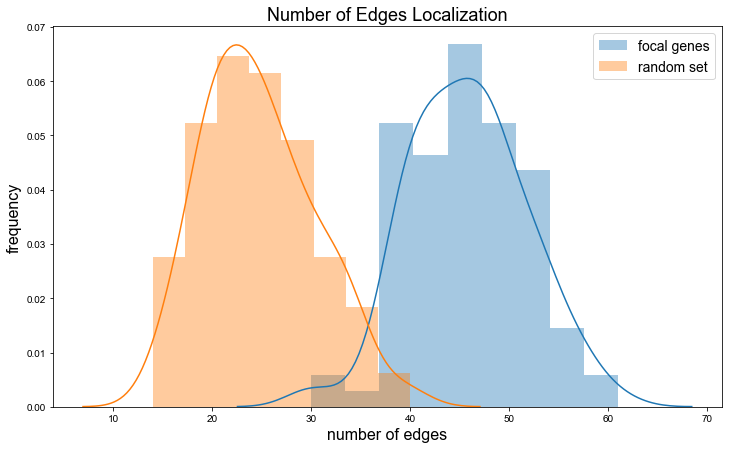

In [12]:
numedges_list, numedges_rand, LCC_list, LCC_rand = heat.localization(num_reps = 100, 
                                                                     sample_frac = 0.8, 
                                                                     method = 'numedges', 
                                                                     plot = True)

# plt.savefig(savedir+'/_AD_numedges_localization'+focal_geneset+'.png',dpi=300,bbox_inches='tight')

4.6949957255293384e-09


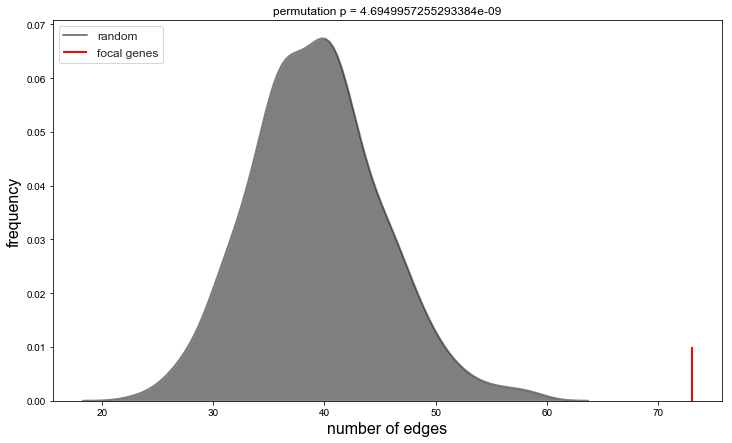

In [13]:
# test out plotting parameters with a smaller num_reps first.
numedges_list, numedges_rand, LCC_list, LCC_rand = heat.localization_full(num_reps = 1000, 
                                                                          method = 'numedges', 
                                                                          label = 'focal genes',
                                                                          line_height = 0.01,
                                                                          legend_loc = 'upper left')
# plt.savefig(savedir+'_AD_numedges_localization_nosamp'+focal_geneset+'.png',dpi=300,bbox_inches='tight')